<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/My Drive/Colab Notebooks/Jupiter_4/'

/content/gdrive/My Drive/Colab Notebooks/Jupiter_4


In [3]:
#Importation de la librairie Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [4]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv

dispo_ali = pd.read_csv('dispo_alimentaire.csv')
#Importation du fichier aide_alimentaire.csv

aide_ali = pd.read_csv('aide_alimentaire.csv')
#Importation du fichier sous_nutrition.csv

sous_nut = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [6]:
#Consulter le nombre de colonnes
nbre_cols = population.shape[1]
print(f'Il y a {nbre_cols} colonnes dans population.')
#La nature des données dans chacune des colonnes
col_types = population.dtypes
print(col_types)
#Le nombre de valeurs présentes dans chacune des colonnes
col_counts = population.count()
print(col_counts)


Il y a 3 colonnes dans population.
Zone       object
Année       int64
Valeur    float64
dtype: object
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [7]:
#Affichage les 5 premières lignes de la table
population.head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [8]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000


In [9]:
#changement du nom de la colonne Valeur par Population
population_new = population.rename(columns={'Valeur': 'Population'})

In [10]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population_new.head())

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_ali.shape[1]))


Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [12]:
#Consulter le nombre de colonnes
dispo_ali.shape

(15605, 18)

In [13]:
#Affichage les 5 premières lignes de la table
dispo_ali.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [14]:
#les information sur le daraset
dispo_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [15]:
#pour voir les lignes qui sont en milliers de tonnes
# Vérification si les lignes sont en milliers de tonnes
ml = dispo_ali['Disponibilité intérieure'] == 'milliers de tonnes'

# Affichage du résultat
print(ml)

0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilité intérieure, Length: 15605, dtype: bool


In [16]:
#remplacement des NaN dans le dataset par des 0
dispo_ali = dispo_ali.fillna(0)


In [17]:
dispo_ali.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [18]:
#renomer les colones
dispo_ali = dispo_ali.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Kcal_pers_jour',
                        'Disponibilité alimentaire en quantité (kg/personne/an)': 'Quantité_kg_pers_an',
                        'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Matière_grasse_g_pers_jour',
                        'Disponibilité de protéines en quantité (g/personne/jour)': 'Protéines_g_pers_jour',
                        'Disponibilité intérieure': 'Dispo_intérieure',
                        'Exportations - Quantité': 'Exportations',
                        'Importations - Quantité': 'Importations'})


In [19]:
#convertir les lignes qui sont en milliers de tonnes en Kg

dispo_ali['Dispo_intérieure'] = dispo_ali['Dispo_intérieure'] * 1000000
dispo_ali['Kcal_pers_jour'] = dispo_ali['Kcal_pers_jour'] * 1000000
dispo_ali['Quantité_kg_pers_an'] = dispo_ali['Quantité_kg_pers_an'] * 1000000
dispo_ali['Matière_grasse_g_pers_jour'] = dispo_ali['Matière_grasse_g_pers_jour'] * 1000000
dispo_ali['Protéines_g_pers_jour'] = dispo_ali['Protéines_g_pers_jour'] * 1000000
dispo_ali['Nourriture'] = dispo_ali['Nourriture'] * 1000000
dispo_ali['Exportations'] = dispo_ali['Exportations'] * 1000000
dispo_ali['Importations'] = dispo_ali['Importations'] * 1000000




In [20]:
#Affichage les 5 premières lignes de la table
#print(dispo_ali)
dispo_ali.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Kcal_pers_jour,Quantité_kg_pers_an,Matière_grasse_g_pers_jour,Protéines_g_pers_jour,Dispo_intérieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5000000.0,1720000.0,200000.0,770000.0,53000000.0,0.0,0.0,53000000.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1000000.0,1290000.0,10000.0,20000.0,41000000.0,2000000.0,40000000.0,39000000.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1000000.0,60000.0,10000.0,30000.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4000000.0,2700000.0,20000.0,50000.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_ali.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [22]:
#Consulter le nombre de colonnes
aide_ali.shape

(1475, 4)

In [23]:
#Affichage les 5 premières lignes de la table
aide_ali.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [24]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_ali = aide_ali.rename(columns={'Pays bénéficiaire': 'Zone'})

In [25]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_ali['Valeur'] = aide_ali['Valeur'] * 1000

In [26]:
#Affichage les 5 premières lignes de la table
aide_ali.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [27]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nut.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nut.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [28]:
#Consulter le nombre de colonnes
sous_nut.shape
sous_nut.describe

<bound method NDFrame.describe of              Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]>

In [29]:
#Afficher les 5 premières lignes de la table
sous_nut.head(5)


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [30]:
#Conversion de la colonne sous nutrition en numérique
#sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'])
#df['Sous nutrition'] = pd.to_numeric(df['Sous nutrition'])


In [31]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
# Conversion de la colonne en numérique
sous_nut['Valeur'] = pd.to_numeric(sous_nut['Valeur'], errors='coerce')

# Remplacement des NaN par des 0
sous_nut['Valeur'] = sous_nut['Valeur'].fillna(0)

In [32]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nut = sous_nut.rename(columns={'Valeur': 'sous_nutrition'})

In [33]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nut['sous_nutrition'] = sous_nut['sous_nutrition'] * 1000000

In [34]:
#Afficher les 5 premières lignes de la table
sous_nut.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [35]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
   #On regarde les valeur unique de la colonne "Année" desous_nut
print(sous_nut['Année'].unique())

['2012-2014' '2013-2015' '2014-2016' '2015-2017' '2016-2018' '2017-2019']


In [36]:
# on remplace les valeurs de "Année" du dataframe sous_nut
sous_nut['Année'] = sous_nut['Année'].replace(['2012-2014', '2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013', '2014','2015','2016','2017','2018'])

#on change le type de la colonne 'Année' de sous_nut en 'int' pour la merge
sous_nut['Année']=sous_nut['Année'].astype(int)

In [37]:
#On merge(jointure) les population_new et sous_nut ensemble sur les colonnes 'Zone' et Année' dans une nouveau df appelé 'df1'
data_1=population_new.merge(right=sous_nut, on=['Zone','Année'] )

In [38]:
#les veleurs etant deja renommer plus haut,on va maintenir l'annee 2017 uniquement
#On garde maintenant que les données concernant l'année 2017 dans un nouveau dataframe data_2017
data_2017 =data_1[data_1.Année==2017]

In [39]:
#on recherche la valeur_population maximal
data_2017['Population'].idxmax(axis = 0)

238

In [40]:
#on recherche la valeur_population minimal
data_2017['Population'].idxmin(axis = 0)

1132

In [41]:
#On regarde les valeur unique de la colonne "Année" de df2017
print(data_2017['Année'].unique())
#on a bien uniquement l'année 2017

[2017]


In [42]:
#Affichage du dataset

data_2017.head(10)

,Zone,Année,Population,sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,0.0
34,Andorre,2017,77001.0,0.0
40,Angola,2017,29816766.0,5800000.0
46,Antigua-et-Barbuda,2017,95426.0,0.0
52,Arabie saoudite,2017,33101179.0,1600000.0
58,Argentine,2017,43937140.0,1500000.0


In [43]:
#on calcule la somme de la population en 2017
total_population2017 = np.round(data_2017['Population'].sum(),3)


In [44]:
print(total_population2017)

7543798779.0


In [45]:
#on calcule la somme de la population en sous nutrition en 2017
total_sous_nutrition2017 = data_2017['sous_nutrition'].sum()

In [46]:
print(total_sous_nutrition2017)

535700000.0


In [47]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

#On divise le total population par 1 000 000_ 1 000 000 000 pour avoir un resultat en Milliard d'habitant
population2017 = np.round(total_population2017/1000000000,3)
#on affiche la somme de la population en 2017
print ("En 2017 la population atteint un total de:",population2017,"milliard d'habitants")

#On divise le total population en sous nutrition par 1000_1 000 000 pour avoir un resultat en Millions d'habitants
sous_nutrition2017 = np.round(total_sous_nutrition2017/1000000,3)
#on affiche la somme de la population en sous nutrition en 2017
print ("En 2017 la population en sous nutrition atteint un total de:",sous_nutrition2017,"millions d'habitants")


En 2017 la population atteint un total de: 7.544 milliard d'habitants
En 2017 la population en sous nutrition atteint un total de: 535.7 millions d'habitants


In [48]:
#On calcule la propotion de population en etat de sous nutrition pour 2017
proportion_sous_nutrition=np.round((total_sous_nutrition2017/total_population2017)*100,2)
#On affiche le Pourcentage de population en état de sous nutrition pour 2017
print('la proportion de personnes en état de sous-nutrition en 2017 est de:',proportion_sous_nutrition,'%')

la proportion de personnes en état de sous-nutrition en 2017 est de: 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [49]:
#Combien mange en moyenne un être humain ? Source => ici on va use le dataset dispo_alimentaire


In [50]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

#On renomme deux pays de data2017, pour qu'ils correspondent aux. pays de df_dispo
#data_2017.rename(index={'Tchéquie': 'Tchéquie (la)',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": 'Royaume-Uni'}, inplace=True)

#On merge la population de df2017 sur df_dispo
df_dispo = dispo_ali.merge(data_2017[['Population','Zone']], how = 'left',left_on = 'Zone', right_on = 'Zone')
df_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Kcal_pers_jour,Quantité_kg_pers_an,Matière_grasse_g_pers_jour,Protéines_g_pers_jour,Dispo_intérieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5000000.0,1720000.0,200000.0,770000.0,53000000.0,0.0,0.0,53000000.0,0.0,53.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1000000.0,1290000.0,10000.0,20000.0,41000000.0,2000000.0,40000000.0,39000000.0,2.0,3.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1000000.0,60000.0,10000.0,30000.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4000000.0,2700000.0,20000.0,50000.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [51]:
#1000000000000

In [52]:
#Affichage du nouveau dataframe


In [53]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
#Création une colonne Disponibilité en kcal/an
df_dispo['Disponibilité alimentaire en million (Kcal/jour)'] = np.round((df_dispo['Kcal_pers_jour'] * df_dispo['Population'])/1000000000000,2)

In [54]:
#Calcul du nombre d'humains pouvant être nourris
df_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Kcal_pers_jour,Quantité_kg_pers_an,Matière_grasse_g_pers_jour,Protéines_g_pers_jour,Dispo_intérieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Disponibilité alimentaire en million (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5000000.0,1720000.0,200000.0,770000.0,53000000.0,0.0,0.0,53000000.0,0.0,53.0,0.0,0.0,0.0,36296113.0,181.48
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1000000.0,1290000.0,10000.0,20000.0,41000000.0,2000000.0,40000000.0,39000000.0,2.0,3.0,0.0,0.0,0.0,36296113.0,36.30
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1000000.0,60000.0,10000.0,30000.0,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36.30
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4000000.0,2700000.0,20000.0,50000.0,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145.18


In [55]:
df_dispo.dtypes

Zone                                                 object
Produit                                              object
Origine                                              object
Aliments pour animaux                               float64
Autres Utilisations                                 float64
Kcal_pers_jour                                      float64
Quantité_kg_pers_an                                 float64
Matière_grasse_g_pers_jour                          float64
Protéines_g_pers_jour                               float64
Dispo_intérieure                                    float64
Exportations                                        float64
Importations                                        float64
Nourriture                                          float64
Pertes                                              float64
Production                                          float64
Semences                                            float64
Traitement                              

In [56]:
#on calcule la somme de la disponibilité alimentaire en kcal/personne/jour
total_kcal_jour =df_dispo['Disponibilité alimentaire en million (Kcal/jour)'].sum()

In [57]:
#On calcul le nombre theorique de personnes qui pourraient etre nourries
total_theorique_nourrie= total_kcal_jour / 2250

#On converti le resultat en milliard pour une lecture plus agréable
total_theorique_nourrie= np.round(total_theorique_nourrie/1000,3)

#On affiche le nombre theorique de personnes qui pourraient etre nourries
print("le nombre theorique de personnes qui pourraient etre nourries est de:",total_theorique_nourrie,"milliard d'habitants")

le nombre theorique de personnes qui pourraient etre nourries est de: 9.297 milliard d'habitants


In [58]:
#On compare le resultat obtenue en pourcentage par rapport au total de la population en 2017
pourcentage_theorique=np.round((total_theorique_nourrie/population2017)*100,2)
print("Théoriquement nous pourions nourrir",pourcentage_theorique,"% de la population mondiale")

Théoriquement nous pourions nourrir 123.24 % de la population mondiale


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [59]:
#Transfert des données avec les végétaux dans un nouveau dataframe et #Calcul du nombre de kcal disponible pour les végétaux
#on stock dans 'dispo_vege' la sommes de la disponibilité alimentaire total des produits d'origine vegetales en million (kcal/jour)
dispo_vege = df_dispo[df_dispo['Origine']=='vegetale']['Disponibilité alimentaire en million (Kcal/jour)'].sum()
print("le nombre de Kcal disponible pour les végétaux est de:",dispo_vege,"Kcal")



le nombre de Kcal disponible pour les végétaux est de: 17260764.14 Kcal


In [60]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
total_theorique_vege= dispo_vege / 2250
print(total_theorique_vege)

7671.450728888889


In [61]:
#On converti le resultat en milliard pour une lecture plus agréable
total_theorique_vege= np.round(total_theorique_vege/1000,3)


In [62]:
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetales
print("le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetale est de:",total_theorique_vege,"milliard d'habitants")

le nombre theorique de personnes qui pourraient etre nourries avec des produits d'origine vegetale est de: 7.671 milliard d'habitants


In [63]:
#On compare le resultat obtenue en pourcentage par rapport au total de la population en 2017
pourcentage_theorique_vege=np.round((total_theorique_vege/population2017)*100,2)
print("Théoriquement nous pourions nourrir",pourcentage_theorique_vege,"% de la population mondiale avec des produits d'origine végétale")

Théoriquement nous pourions nourrir 101.68 % de la population mondiale avec des produits d'origine végétale


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

Disponibilité intérieure = Production + Importations + Variation - Exportations = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations

In [64]:
#Calcul de la disponibilité interieur totale

total_dispo_interieur =df_dispo['Dispo_intérieure'].sum()
print("La somme de disponibilité est de :",total_dispo_interieur)

La somme de disponibilité est de : 9848994000000.0


In [65]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,


### a- Disponibilité alimentaire pour aliment animal

In [66]:
#On garde uniquement la disponibilité interieur pour l'alimentation attribué aux animaux
df_dispo_interieur_animal =df_dispo[df_dispo['Aliments pour animaux']!=0]
#on calcule la somme des aliments pour animaux
total_alimentation_animale =df_dispo['Aliments pour animaux'].sum()
print(total_alimentation_animale)

1304245.0


In [67]:
#Proportion de dispo interieur attribué aux animaux
total_animale=np.round((total_alimentation_animale/total_dispo_interieur)*100000000,2)
#On affiche la proportion de la disponibilité inbterieur attribué à l'alimentation animal
print("la proportion de la disponibilité interieur attribué à l'alimentation animal est de:",total_animale,"%")

la proportion de la disponibilité interieur attribué à l'alimentation animal est de: 13.24 %


### b-Alimentation perdu

In [68]:
#On fait la sommes de la disponibilité interieur pour les pertes
total_alimentation_pertes =df_dispo['Pertes'].sum()
print("la somme de la disponibilité interieur est de :",total_alimentation_pertes)

la somme de la disponibilité interieur est de : 453698.0


In [69]:
#Proportion de dispo interieur perdue
total_pertes=np.round((total_alimentation_pertes/total_dispo_interieur)*100000000,2)
#On affiche la proportion de la disponibilité interieur perdue
print("la proportion de la disponibilité interieur perdue est de:",total_pertes,"%")

la proportion de la disponibilité interieur perdue est de: 4.61 %


### c- Nourriture

In [70]:
#On fait la sommes de la disponibilité interieur pour l'alimentation humaine
total_alimentation_humaine =df_dispo['Nourriture'].sum()
print(total_alimentation_humaine)

4876258000000.0


In [71]:
#Proportion de dispo interieur pour l'alimenttion humaine
total_humaine=np.round((total_alimentation_humaine/total_dispo_interieur)*100,2)
#On affiche la proportion de la disponibilité interieur pour l'alimentation humaine
print("la proportion de la disponibilité interieur pour l'alimentation humaine est de:",total_humaine,"%")

la proportion de la disponibilité interieur pour l'alimentation humaine est de: 49.51 %


## Visualisation disponibilitées alimentaires

In [72]:
#On creer df_pie pour faire une visualisation des disponibilitées alimentaires
#df_pie=df_dispo.drop(df_dispo.columns[[0,1,4,5,6,7,8,9,10,13,16,17,18]], axis=1).sum()
#colonnes = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']
#df_pie = df_dispo[colonnes].sum()

colonnes_a_garder = ['Aliments pour animaux', 'Autres Utilisations',  'Pertes', 'Semences', 'Traitement']
colonnes_a_supprimer = [col for col in df_dispo.columns if col not in colonnes_a_garder]
df_pie = df_dispo.drop(colonnes_a_supprimer, axis=1).sum()
df_pie=df_pie.apply(lambda x: f'{x:.0f}')

In [73]:
df_pie = df_pie.astype(float)

In [74]:
df_pie.head(10)

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

In [75]:
#!pip install --upgrade matplotlib

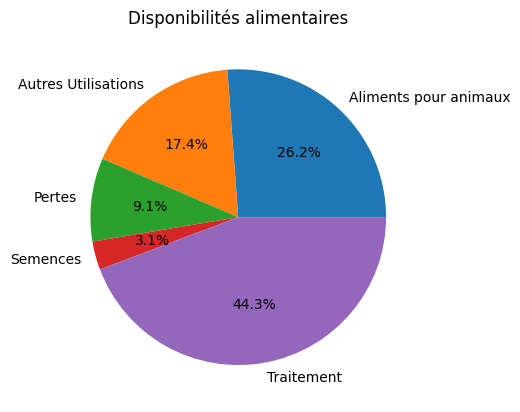

In [76]:
df_pie_normalized = df_pie / df_pie.sum()

plt.pie(df_pie_normalized, labels=df_pie.index, autopct='%1.1f%%')
plt.title('Disponibilités alimentaires')
plt.show()

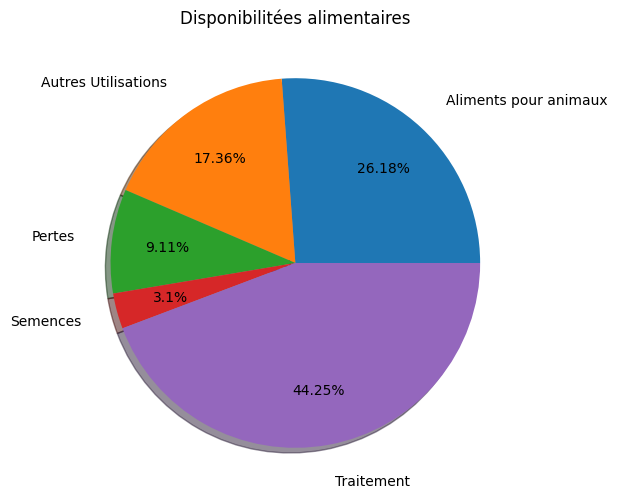

In [77]:
#df_pie_normalized = df_pie / df_pie.sum()
#On definit la taille du Pie plot
plt.figure(figsize = (6, 6))

#On regle et on affiche le Pie plot
plt.pie(x = df_pie.head(6), labels=['Aliments pour animaux', 'Autres Utilisations',  'Pertes', 'Semences', 'Traitement'],
           explode = [0, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.title('Disponibilitées alimentaires');

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [78]:
# ON Regarde les valeurs unique de la colone "produit"
print(dispo_ali['Produit'].unique())

['Abats Comestible' 'Agrumes, Autres' 'Aliments pour enfants' 'Ananas'
 'Bananes' 'Beurre, Ghee' 'Bière' 'Blé' 'Boissons Alcooliques' 'Café'
 'Coco (Incl Coprah)' 'Crème' 'Céréales, Autres' 'Dattes'
 'Edulcorants Autres' 'Feve de Cacao' 'Fruits, Autres' 'Graines de coton'
 'Graines de tournesol' 'Graisses Animales Crue' 'Huil Plantes Oleif Autr'
 'Huile Graines de Coton' "Huile d'Arachide" "Huile d'Olive"
 'Huile de Colza&Moutarde' 'Huile de Palme' 'Huile de Soja'
 'Huile de Sésame' 'Huile de Tournesol' 'Lait - Excl Beurre'
 'Légumes, Autres' 'Légumineuses Autres' 'Maïs' 'Miel' 'Millet'
 'Miscellanees' 'Noix' 'Oeufs' 'Olives' 'Oranges, Mandarines' 'Orge'
 'Plantes Oleiferes, Autre' 'Poissons Eau Douce' 'Poivre' 'Pommes'
 'Pommes de Terre' 'Raisin' 'Riz (Eq Blanchi)' 'Sucre Eq Brut'
 'Sucre, betterave' 'Sucre, canne' 'Sésame' 'Thé' 'Tomates'
 "Viande d'Ovins/Caprins" 'Viande de Bovins' 'Viande de Volailles'
 'Viande, Autre' 'Vin' 'Épices, Autres' 'Alcool, non Comestible'
 'Animaux Aquat

In [79]:
#Création d'une liste avec toutes les variables
#Dispo cereale 2017
#Création d'un dataframe avec les informations uniquement pour ces céréales
liste_cereale2017 = ['Blé','Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz', 'Avoine', 'Sorgho', 'Sésame']
df_cereale2017 = df_dispo[df_dispo["Produit"].isin(liste_cereale2017)].groupby("Zone").sum().reset_index()
#Affichage de la proportion d'alimentation animale
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum() / df_cereale2017["Dispo_intérieure"].sum(),
df_cereale2017['Nourriture'].sum() / df_cereale2017["Dispo_intérieure"].sum(),]
prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])

In [80]:
liste_cereale2017 = ['Blé','Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz', 'Avoine', 'Sorgho', 'Sésame']
df_cereale2017 = df_dispo[df_dispo["Produit"].isin(liste_cereale2017)]

In [81]:
#df_cereale2017


In [82]:
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum()*100 / df_cereale2017["Dispo_intérieure"].sum(),
df_cereale2017['Nourriture'].sum() *100/ df_cereale2017["Dispo_intérieure"].sum(),]
#prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])

In [83]:
prop_list2017

[4.334740823306075e-05, 33.749431350080435]

In [84]:
#On affiche les resultats de 2017
prop_list2017

[4.334740823306075e-05, 33.749431350080435]

In [85]:
values = [6.933506248526291e-07, 0.18130550970683015, 0.8186937969425451]

# Calcul de la somme totale
total = sum(values)

# Normalisation des valeurs
normalized_values = [value/total for value in values]

# Conversion en pourcentages
prop_list2017_n= [value * 100 for value in normalized_values]

print(prop_list2017)


[4.334740823306075e-05, 33.749431350080435]


In [86]:
#ata = [6.933506248526291e-07, 0.18130550970683015, 0.8186937969425451]
prop_list2017 = [x / sum(prop_list2017) for x in prop_list2017]

In [87]:
#On regle la taille du pie plot
#plt.figure(figsize = (6, 6))
#On affiche le pie plot
#plt.pie(prop_list2017_n, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
#plt.title('Répartition des céréales 2017');

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [88]:
data_2017.head()

,Zone,Année,Population,sous_nutrition
4,Afghanistan,2017,36296113.0,10500000.0
10,Afrique du Sud,2017,57009756.0,3100000.0
16,Albanie,2017,2884169.0,100000.0
22,Algérie,2017,41389189.0,1300000.0
28,Allemagne,2017,82658409.0,0.0


In [89]:
#Création de la colonne proportion par pays
data_2017['pourcentage_sous_nutrition'] = np.round((data_2017['sous_nutrition'] / data_2017['Population'])*100,2)

In [90]:
# pour suprimer les valeurs manquantes: data_2017.dropna(subset = ["pourcentage_sous_nutrition"], inplace=True)

In [91]:
#affichage après trie des 10 pires pays
#On affiche les 10 pays avec le taux de sous-nutriton les plus élevés en 2017
data_2017.sort_values(by = 'pourcentage_sous_nutrition', ascending = False).head(10)

,Zone,Année,Population,sous_nutrition,pourcentage_sous_nutrition
472,Haïti,2017,10982366.0,5300000.0,48.26
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
652,Madagascar,2017,25570512.0,10500000.0,41.06
622,Libéria,2017,4702226.0,1800000.0,38.28
604,Lesotho,2017,2091534.0,800000.0,38.25
1102,Tchad,2017,15016753.0,5700000.0,37.96
970,Rwanda,2017,11980961.0,4200000.0,35.06
730,Mozambique,2017,28649018.0,9400000.0,32.81
1120,Timor-Leste,2017,1243258.0,400000.0,32.17
4,Afghanistan,2017,36296113.0,10500000.0,28.93


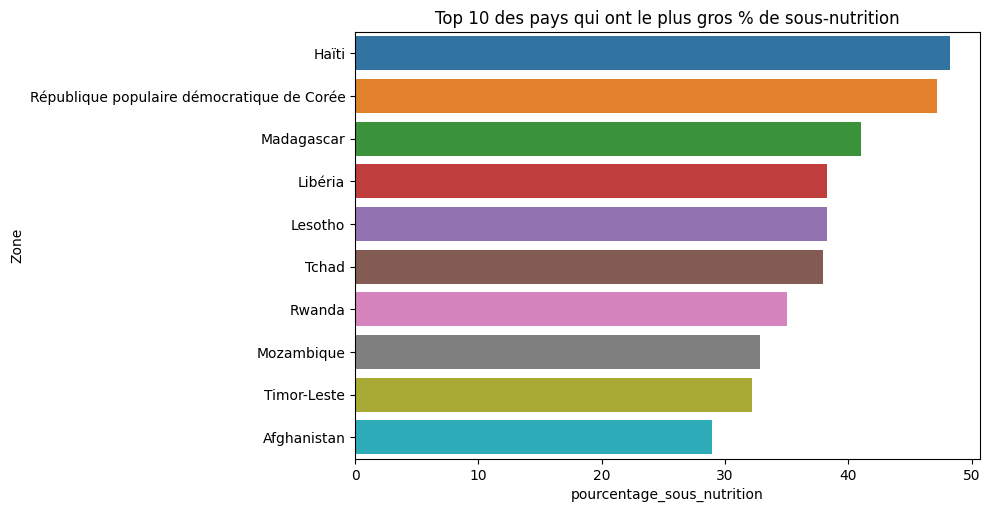

In [92]:
#On affiche un graphique avec les 10 pays qui ont le plus gros pourcentage de sous-nutrition
top_10_nutri = data_2017.sort_values(by = 'pourcentage_sous_nutrition', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y="Zone")
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")
plt.show()

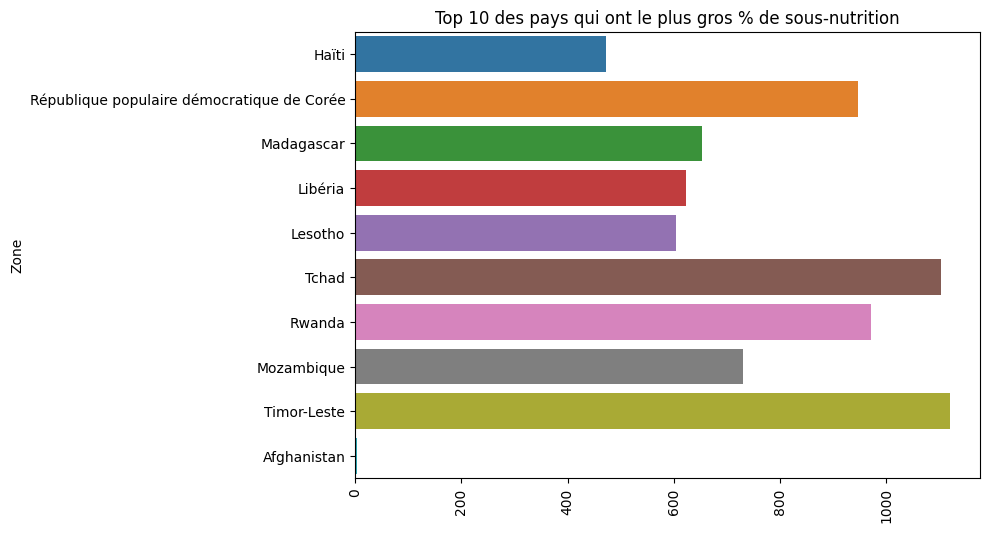

In [93]:
top_10_nutri = data_2017.sort_values(by='pourcentage_sous_nutrition', ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_nutri, x=top_10_nutri.index, y='Zone')
plt.tight_layout()
plt.title('Top 10 des pays qui ont le plus gros % de sous-nutrition')
plt.xticks(rotation=90)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [94]:
#On supprimme les colonne Produit et année
df_aide_recu= aide_ali.drop(columns=['Produit', 'Année'])

#On affiche le dataframe de façon plus lisible, en groupant par Pays et Année, puis en fesant la sommes des lignes groupées
df_aide_recu = aide_ali.groupby(['Zone']).agg({'Valeur': np.sum})
df_aide_recu.head()

,Valeur
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000


In [95]:
#calcul du total de l'aide alimentaire par pays


In [96]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
#On affiche les 10 pays qui ont le plus bénéficié d'aide depuis 2013
df_aide_recu.sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<function matplotlib.pyplot.show(close=None, block=None)>

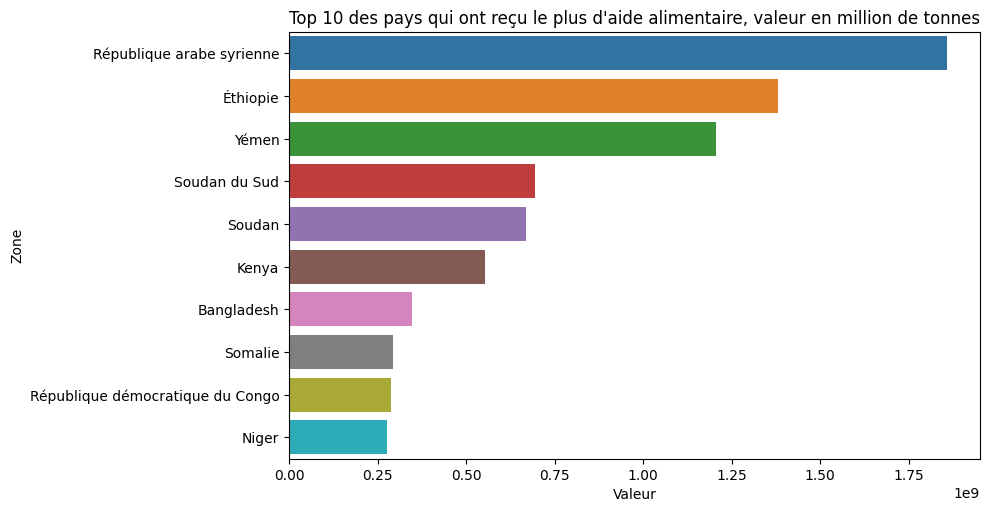

In [97]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_10_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")
plt.show

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

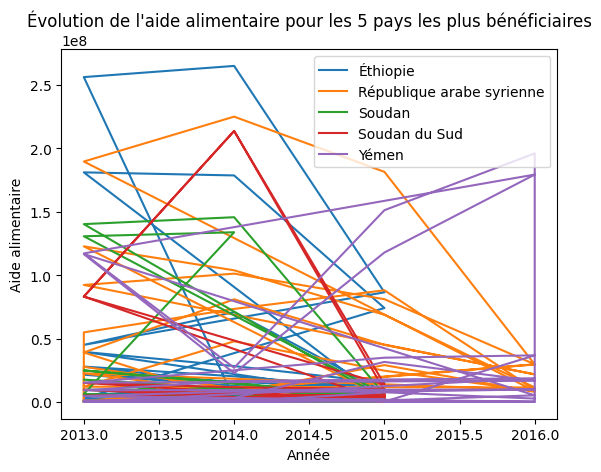

In [129]:
#Filtrer les données pour la période de 2013 à 2016
filtered_data = aide_ali[(aide_ali['Année'] >= 2013) & (aide_ali['Année'] <= 2016)]

#Regrouper les données par pays et calculer le total de l'aide alimentaire pour chaque pays
total_aid = filtered_data.groupby('Zone')['Valeur'].sum().reset_index()

#Trier les pays par montant d'aide alimentaire (du plus grand au plus petit)
top_5_countries = total_aid.nlargest(5, 'Valeur')

#Récupérer les données pour les 5 pays sélectionnés
top_5_data = filtered_data[filtered_data['Zone'].isin(top_5_countries['Zone'])]

#Tracer l'évolution de l'aide alimentaire pour chaque pays
for country in top_5_data['Zone'].unique():
    country_data = top_5_data[top_5_data['Zone'] == country]
    plt.plot(country_data['Année'], country_data['Valeur'], label=country)

#Ajouter des étiquettes et une légende au graphique
plt.xlabel('Année')
plt.ylabel('Aide alimentaire')
plt.title('Évolution de l\'aide alimentaire pour les 5 pays les plus bénéficiaires')
plt.legend()

#Afficher le graphique
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

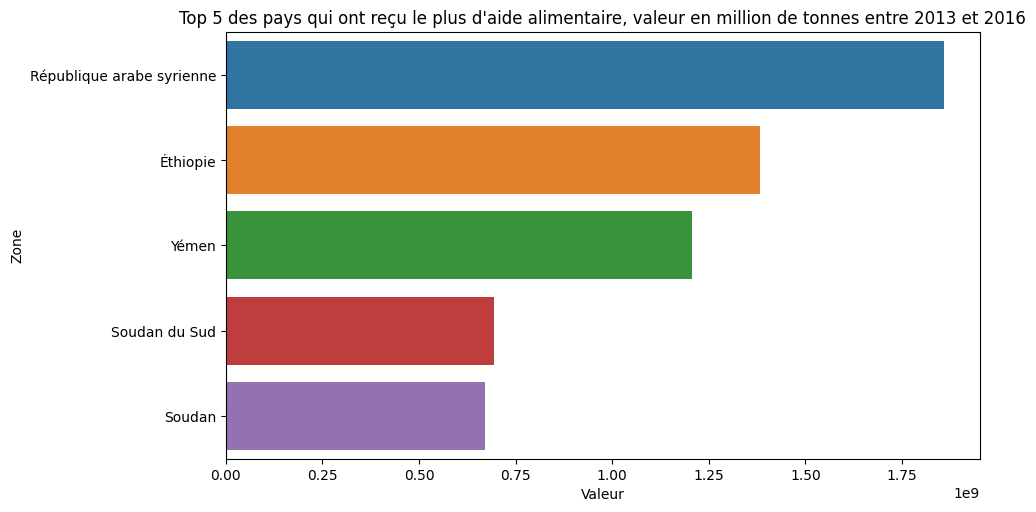

In [130]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_5_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False).head(5)
plt.figure(figsize = (10, 5))
sns.barplot(data=top_5_aide, x="Valeur", y=top_5_aide.index)
plt.tight_layout()
plt.title("Top 5 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes entre 2013 et 2016")
plt.show

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [105]:
#Calcul de la disponibilité en kcal par personne par jour par pays

#On regroupe par Zone(Pays), puis en fesant la sommes des lignes groupées dans un dataframe appelé top_dispo
top_dispo = df_dispo.groupby(['Zone']).agg({
'Aliments pour animaux': np.sum,'Autres Utilisations': np.sum,'Kcal_pers_jour': np.sum,
'Quantité_kg_pers_an': np.sum,'Matière_grasse_g_pers_jour': np.sum,
'Protéines_g_pers_jour': np.sum,'Dispo_intérieure': np.sum,
'Exportations': np.sum,'Importations': np.sum,'Nourriture': np.sum,'Pertes': np.sum,'Production': np.sum,'Semences': np.sum,
'Traitement': np.sum,'Variation de stock': np.sum})
#On rajoute un index a top_dispo
top_dispo = top_dispo.reset_index()


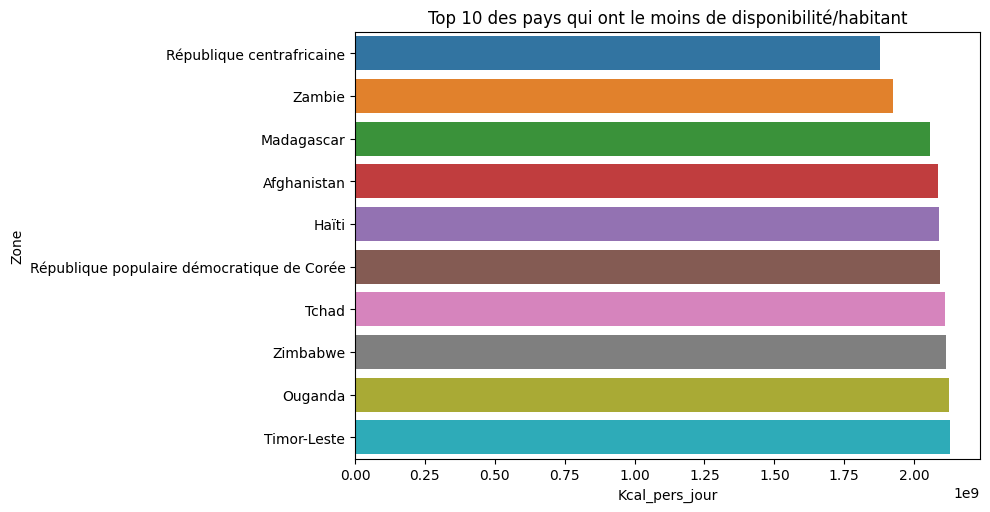

In [106]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
#On affiche les 10 pays qui ont le moins de disponibilité alimentaire/habitant sur un graphique
bottom_10_dispo = top_dispo.sort_values(by = 'Kcal_pers_jour', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=bottom_10_dispo, x="Kcal_pers_jour", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

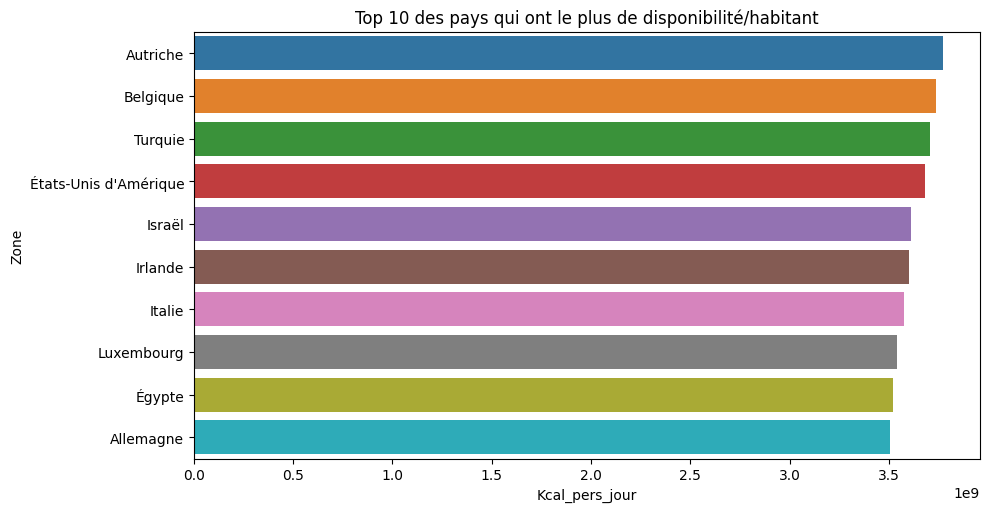

In [107]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
#On affiche les 10 pays qui ont le plus de disponibilité alimentaire/habitant sur un graphique
top_10_dispo = top_dispo.sort_values(by = 'Kcal_pers_jour', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_dispo, x="Kcal_pers_jour", y=top_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de disponibilité/habitant")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [108]:
#création d'un dataframe avec uniquement la Thaïlande

#On ajoute un index
df_dispo = df_dispo.reset_index()
#On crée la variable "exportation_manioc" qui correspond à aux données de la Thailande sur le produit 'manioc'
exportation_manioc = df_dispo.loc[(df_dispo['Produit'] == "Manioc") & (df_dispo['Zone'] == "Thaïlande"),:]

In [109]:
#On affiche les données concernant le manioc en Thailande
exportation_manioc

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Kcal_pers_jour,Quantité_kg_pers_an,Matière_grasse_g_pers_jour,Protéines_g_pers_jour,...,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Disponibilité alimentaire en million (Kcal/jour)
13809,13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40000000.0,13000000.0,50000.0,140000.0,...,2.521400e+10,1.250000e+09,871000000.0,1511.0,30228.0,0.0,0.0,0.0,69209810.0,2768.39


In [110]:
#On affiche la proportion exportée à partir de la production
print("La proportion de manioc exportée est de:", "{:.2f}".format(exportation_manioc['Exportations'].iloc[0]*100 /exportation_manioc['Production'].iloc[0]), "%")

La proportion de manioc exportée est de: 83412729.92 %


In [111]:
percentage = 8341272991.93
new_percentage = percentage / 100000000
print(f"{new_percentage:.2f} %")

83.41 %


In [112]:
#On recupere la population + la population en sous nutrition en 2017 en Thailande dans df_popu_thailande
#df_popu_thailande = data_2017.loc(['Zone'] == "Thaïlande")
#df_popu_thailande = data_2017.loc[data_2017['Zone'] == 'Thaïlande', 'sous_nutrition']
df_popu_thailande = data_2017.loc[data_2017['Zone'] == 'Thaïlande', ['sous_nutrition', 'Population']]
#On calcule le pourcentage de sous nutrition en Thailande en 2017
sous_nutrition_thailande = np.round((df_popu_thailande['sous_nutrition'] / df_popu_thailande['Population'])*100,2)
#On affiche le pourcentge de sous-nutriton en Thailande pour 2017
print("le pourcentage de sous-nutrition en thailande est de:",sous_nutrition_thailande,"%")


le pourcentage de sous-nutrition en thailande est de: 1114    8.96
dtype: float64 %


In [113]:
exportation_manioc

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Kcal_pers_jour,Quantité_kg_pers_an,Matière_grasse_g_pers_jour,Protéines_g_pers_jour,...,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,Disponibilité alimentaire en million (Kcal/jour)
13809,13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40000000.0,13000000.0,50000.0,140000.0,...,2.521400e+10,1.250000e+09,871000000.0,1511.0,30228.0,0.0,0.0,0.0,69209810.0,2768.39


In [114]:
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec l'exportation de manioc en Thailande

print("Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est:","{:.0f}".format(exportation_manioc['Exportations'].iloc[0]*1000000*1250 /2500/365),"habitants")
print("Ce qui représente:", "{:.2f}".format(exportation_manioc['Exportations'].iloc[0]*1000000*1250 /2500/365/exportation_manioc['Population'].iloc[0]*100), "% de la population de Thailande")


Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est: 34539726027397 habitants
Ce qui représente: 49905824.08 % de la population de Thailande


In [115]:
percentage =  49905824.08
new_percentage = percentage / 1000000
print(f"{new_percentage:.2f} %")

49.91 %


In [116]:
#Calcul de la sous nutrition en Thaïlande


In [117]:
# On calcule la proportion exportée en fonction de la proportion


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [118]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
#le plus en difficulté au niveau alimentaire"

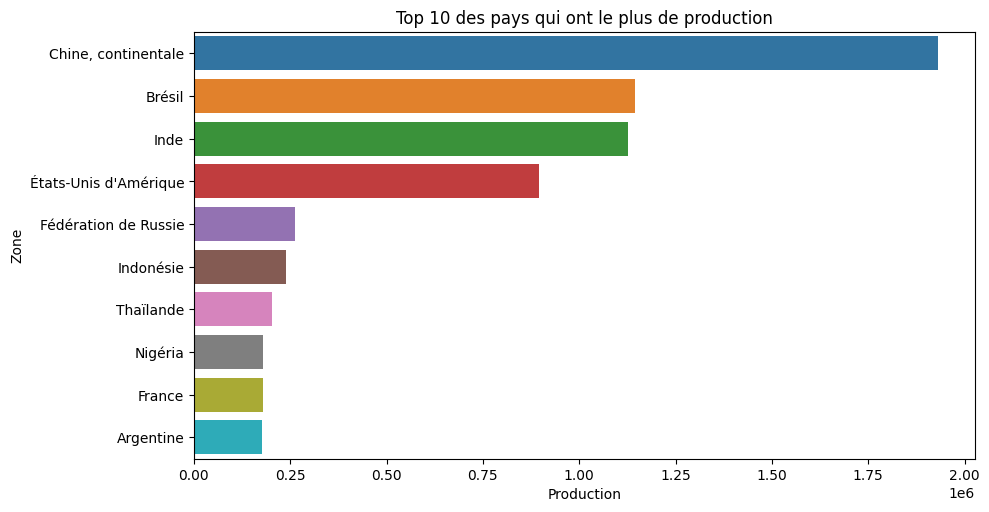

In [119]:
#On affiche les 10 pays qui produisent le plus sur un graphique
top_10_prod = top_dispo.sort_values(by = 'Production', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_prod, x="Production", y=top_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de production")
plt.show()

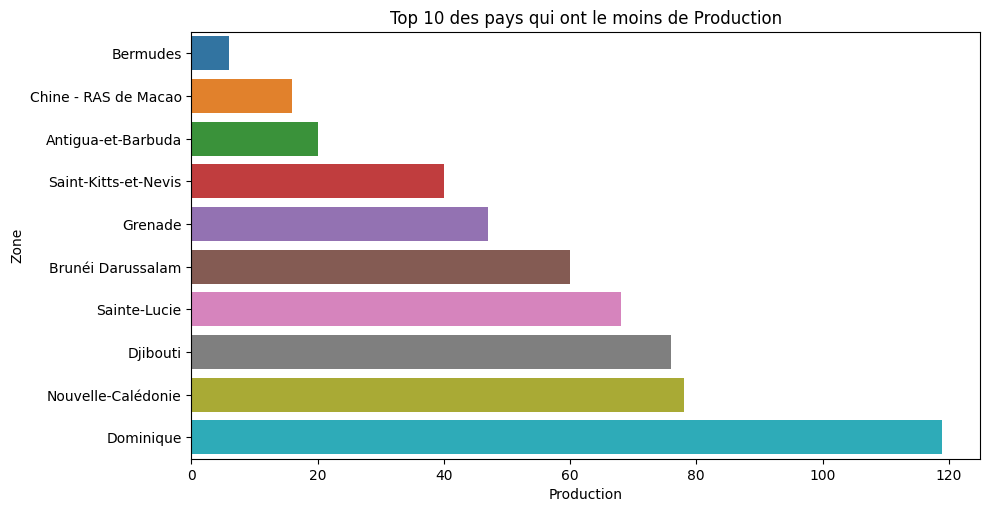

In [120]:
#On affiche les 10 pays avec le moins de production sur un graphique
dernier_10_prod = top_dispo.sort_values(by = 'Production', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=dernier_10_prod, x="Production", y=dernier_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")
plt.show()

Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants


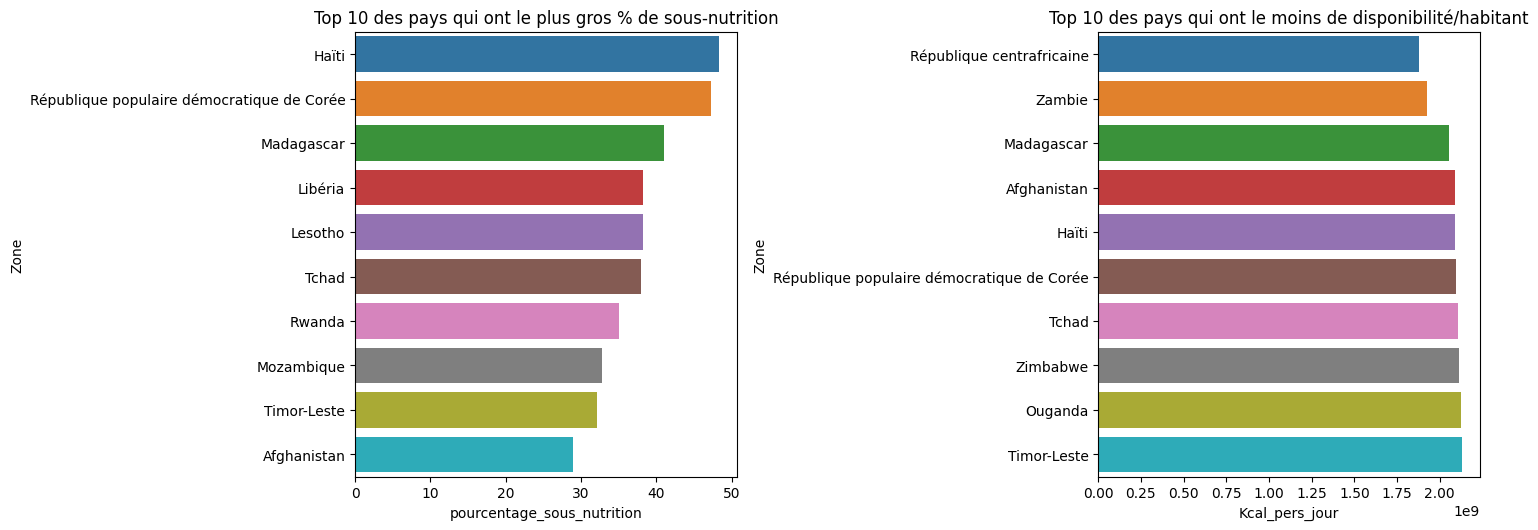

In [121]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y="Zone")
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")


plt.subplot(222)
sns.barplot(data=bottom_10_dispo, x="Kcal_pers_jour", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant")

print("Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants")

Parmi les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 


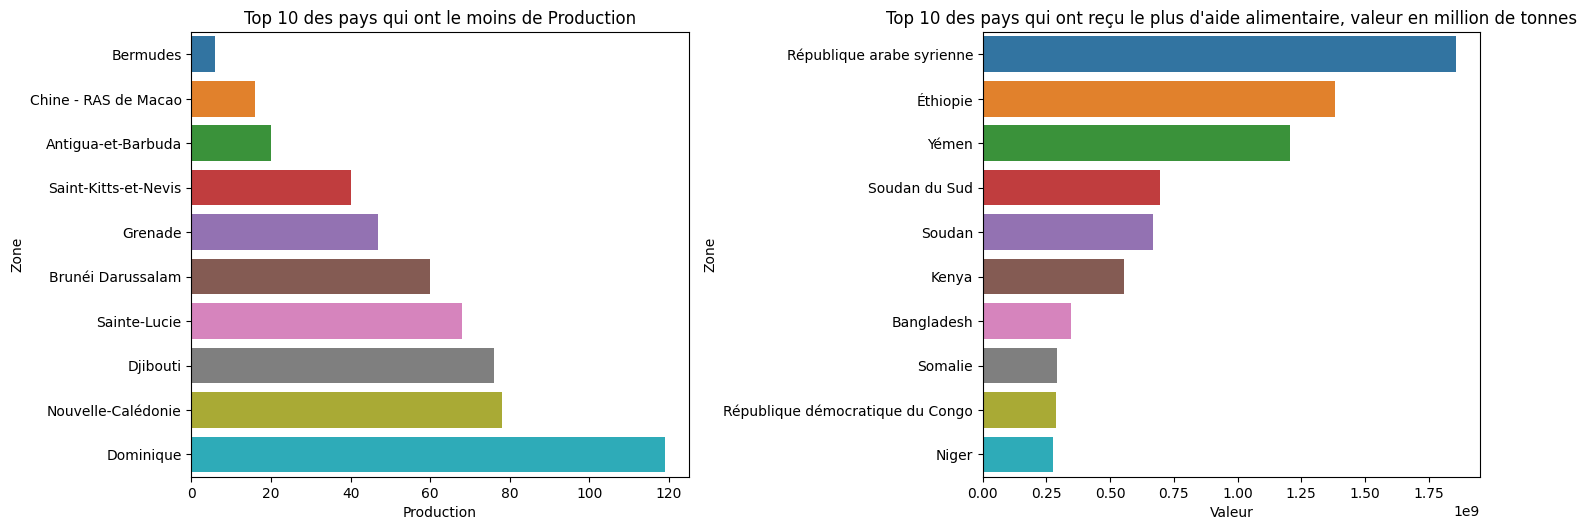

In [122]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=dernier_10_prod, x="Production", y=dernier_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Parmi les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 ")

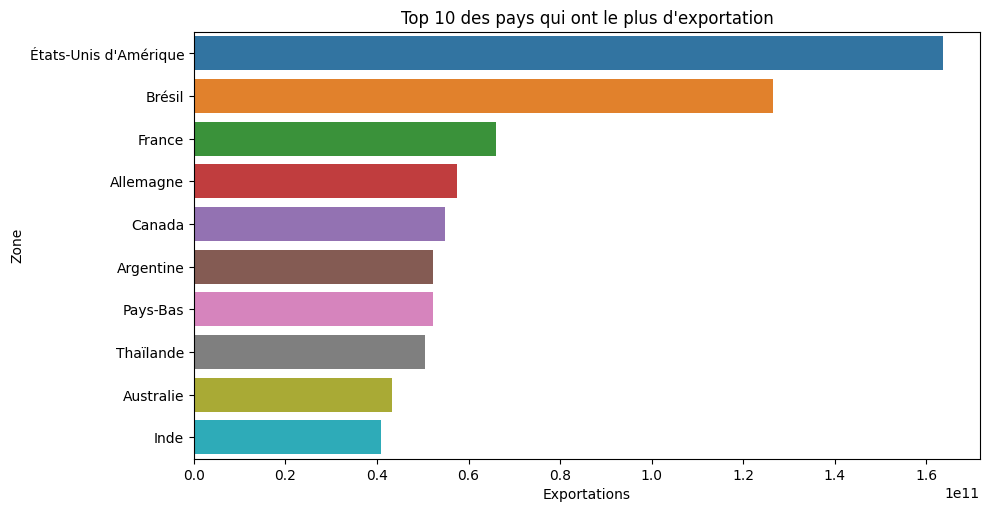

In [123]:
#On affiche les 10 pays qui exportent le plus sur un graphique
top_10_expor = top_dispo.sort_values(by = 'Exportations', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_expor, x="Exportations", y=top_10_expor.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus d'exportation")
plt.show()

Parmi les 10 pays qui ont letaux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 


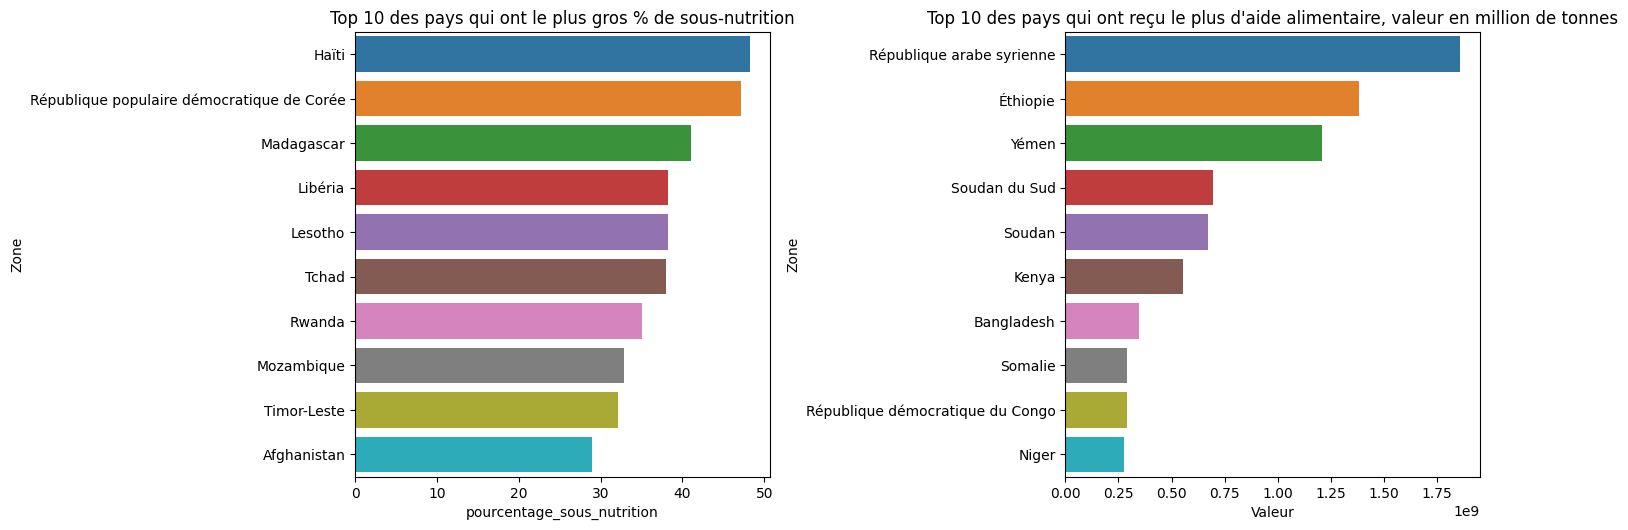

In [124]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="pourcentage_sous_nutrition", y="Zone")
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Parmi les 10 pays qui ont letaux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 ")